In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1LxF2TdIqrZ71l8IQIbnVUejcpyoVVgKH/view?usp=sharing
downloaded = drive.CreateFile({'id':'1LxF2TdIqrZ71l8IQIbnVUejcpyoVVgKH'}) 
downloaded.GetContentFile('training.1600000.processed.noemoticon')  
data = pd.read_csv('training.1600000.processed.noemoticon',encoding='latin-1',header=None)

In [ ]:
data.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
stemmer = PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
text1=[]

In [ ]:
for i in range(750000,850000):
    sentence = re.sub('[^a-zA-Z123456789]', ' ', data[5][i])
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [stemmer.stem(word) for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(sentence)
    text1.append(sentence)

In [ ]:
len(text1)

100000

In [ ]:
y = data[0][750000:850000]

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
voc_size = 10000
onehot_repr=[one_hot(words,voc_size)for words in text1] 
onehot_repr

In [ ]:
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
#print(embedded_docs)

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.7))
model.add(LSTM(100))
model.add(Dropout(0.7))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 50, 40)            400000    
_________________________________________________________________
dropout_25 (Dropout)         (None, 50, 40)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 100)               56400     
_________________________________________________________________
dropout_26 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(embedded_docs),y.shape

(100000, (100000,))

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [ ]:
for i in range(100000):
  if y_final[i]==4:
    y_final[i]=1

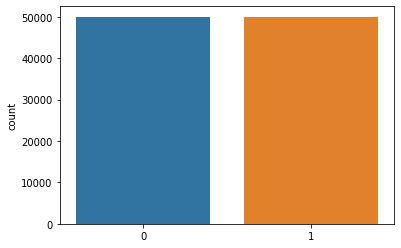

In [ ]:
sns.countplot(y_final)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)


In [ ]:
# Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
2094/2094 [==============================] - 49s 23ms/step - loss: 0.4504 - accuracy: 0.7904 - val_loss: 0.4974 - val_accuracy: 0.7572
Epoch 2/5
2094/2094 [==============================] - 48s 23ms/step - loss: 0.4392 - accuracy: 0.7974 - val_loss: 0.4979 - val_accuracy: 0.7575
Epoch 3/5
2094/2094 [==============================] - 46s 22ms/step - loss: 0.4293 - accuracy: 0.8034 - val_loss: 0.5018 - val_accuracy: 0.7559
Epoch 4/5
2094/2094 [==============================] - 47s 23ms/step - loss: 0.4222 - accuracy: 0.8078 - val_loss: 0.5178 - val_accuracy: 0.7536
Epoch 5/5
2094/2094 [==============================] - 48s 23ms/step - loss: 0.4147 - accuracy: 0.8104 - val_loss: 0.5256 - val_accuracy: 0.7541


In [ ]:
y_pred=model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

[[12537  3997]
 [ 4118 12348]]


0.7540909090909091

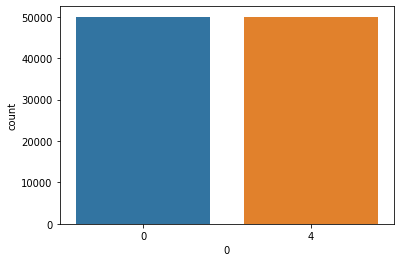

In [ ]:
sns.countplot(y)

In [ ]:
#https://drive.google.com/file/d/1_VWF8om2pO4Bn77WygW-ggXKHFffY8k6/view?usp=sharing
#https://drive.google.com/file/d/1_VWF8om2pO4Bn77WygW-ggXKHFffY8k6/view?usp=sharing
downloaded = drive.CreateFile({'id':'1_VWF8om2pO4Bn77WygW-ggXKHFffY8k6'}) 
downloaded.GetContentFile('ocr_final_data.csv')  
data1 = pd.read_csv('ocr_final_data.csv')

In [ ]:
data1.head()

,Unnamed: 0,Unnamed: 0.1,Filename,Category,Text,finalprediction
0,0,0,Test1001.jpg,NaN,when people ask what i in see you ijust and s...,Positive
1,1,1,Test1012.jpg,NaN,love too beautiful is to be hidden in the closet,Positive
2,2,2,Test1022.jpg,NaN,orbrf oizbrf ozbrf is oibrf re hue oabre oiabrf,Positive
3,3,3,Test1071.jpg,NaN,s people hate may you c for different being a...,Positive
4,4,4,Test1122.jpg,NaN,tar r igu ahlte cming tloet authorol hon iri ...,Negative


In [ ]:
predtext=[]

In [ ]:
for i in range(239):
    sentence = re.sub('[^a-zA-Z123456789\n]', ' ', str(data1['Text'][i]))
    sentence = sentence.lower()
    sentence = sentence.split()
    sentence = [stemmer.stem(word) for word in sentence if not word in stopwords.words('english')]
    sentence = ' '.join(sentence)
    predtext.append(sentence)

In [ ]:
len(predtext)

239

In [ ]:
onehot_repr1=[one_hot(words,voc_size)for words in predtext] 
onehot_repr1

In [ ]:
sent_length=50
embedded_docs1=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)

In [ ]:
ypred = model.predict(embedded_docs1)

In [ ]:
ypred[0]

array([0.69834465], dtype=float32)

In [ ]:
if(ypred[0]>0.69):
  print("sj")
else:
  print("frf")

sj


In [ ]:
finalprediction = []
for i in range(239):
  if(ypred[i]>0.5):
    finalprediction.append('Positive')
  else:
    finalprediction.append('Negative')

In [ ]:
finalprediction[0]

'Positive'

In [ ]:
data1['finalprediction'] = finalprediction

In [ ]:
type(data1['Text'][1])

str

In [ ]:
j=0
for i in range(239):
  if type(data1['Text'][i])==float:
    data1['finalprediction'][i]="Random"
    j=j+1

print(j)

47


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


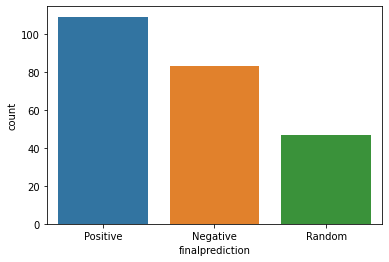

In [ ]:
sns.countplot(data1['finalprediction'])

In [ ]:
mydata = data1['Filename']

In [ ]:
finalcsv = pd.DataFrame(mydata)

In [ ]:
finalcsv['Category'] = data1['finalprediction']

In [ ]:
finalcsv.head()

,Filename,Category
0,Test1001.jpg,Positive
1,Test1012.jpg,Positive
2,Test1022.jpg,Positive
3,Test1071.jpg,Positive
4,Test1122.jpg,Negative


In [ ]:
from google.colab import files

finalcsv.to_csv('submission2.csv')
files.download('submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>